In [1]:
from cobaya.yaml import yaml_load_file
import getdist.plots as gdplt
import getdist
import os, fnmatch
from cobaya import load_samples
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

%matplotlib inline 

def loadgridchains(path, excludec=[], subdir_idx = 0):
    Samples={}
    for root, dirs, files in os.walk(path):
        for chain_name in sorted(fnmatch.filter(dirs, 'base_*')):
            if chain_name in excludec: continue
            subdirs = sorted(next(os.walk(os.path.join(root, chain_name)))[1])
            only_subdir = subdirs[subdir_idx]
            subdir_path = os.path.join(root, chain_name, only_subdir)
            Samples[chain_name] = load_samples(subdir_path+'/'+chain_name+'_'+only_subdir, to_getdist=True)
            print(chain_name+'_'+only_subdir)
            Samples[chain_name].label = chain_name
            Samples[chain_name].ma_val = -int(chain_name[-2:])
            p=Samples[chain_name].getParams()
            Samples[chain_name].addDerived(p.omega_scf/(p.omega_cdm+p.omega_b+p.omega_scf), name='fx', label=r'f_\chi', range=[0.,None])
    return list(Samples.values())

mvals = [-24, -25, -26, -27, -28,-29, -30]
RogersBOSS = [0.155,0.04174,0.01717,0.00542,0.00842,0.02259,0.02771]
RogersPlanck = [0.11399,0.09667,0.00615,0.00344,0.00163,0.00136,0.00145]
RogersPlanckBOSS = [0.10858,0.03306,0.00689,0.00181,0.00095,0.00097,0.00099]

base_m25_nobx
base_m26_nobx
base_m27_nobx
base_m25_withbx
base_m26_withbx
base_m27_withbx


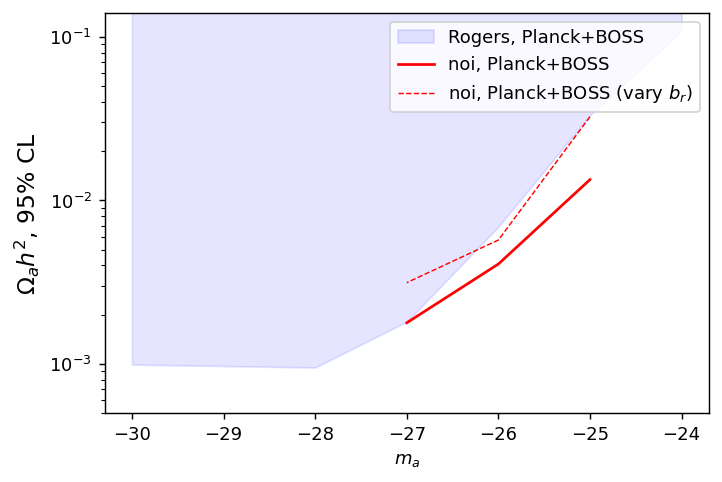

In [3]:
plt.figure(figsize=(6,4), dpi=130)
mvals = [-24, -25, -26, -27, -28,-29, -30]

plt.fill_between(mvals, RogersPlanckBOSS, y2=0.16, interpolate=True, color='b', alpha=0.1, label='Rogers, Planck+BOSS')


# -----------
mycmbBOSSvals = np.array([[samp.ma_val,samp.getMargeStats().parWithName('omega_scf').limits[1].upper] for samp in loadgridchains('/home/fverdian/cobaya/chains-ulysses/axigrid_bx')])
mv, lims = mycmbBOSSvals.T
plt.plot(mv, lims, color='r', label='noi, Planck+BOSS')

# -----------
mycmbBOSSvalsbr = np.array([[samp.ma_val,samp.getMargeStats().parWithName('omega_scf').limits[1].upper] for samp in loadgridchains('/home/fverdian/cobaya/chains-ulysses/axigrid_bx', subdir_idx=1)])
mv, lims = mycmbBOSSvalsbr.T
plt.plot(mv, lims,'r--', linewidth=0.8, label=r'noi, Planck+BOSS (vary $b_r$)')


plt.ylim([5.e-4,0.14])
plt.yscale('log')
plt.xlabel(r'$m_a$')
plt.ylabel(r'$\Omega_a h^2$, 95% CL', fontsize=13)
plt.legend()
plt.show()

/home/fverdian/cobaya/chains-ulysses/axigrid_bx/base_m25/withbx/base_m25_withbx
/home/fverdian/cobaya/chains-ulysses/axigrid_bx/base_m25/nobx/base_m25_nobx
['b1_ngc_z1', 'b1_sgc_z1', 'b1_ngc_z3', 'b1_sgc_z3', 'bx_ngc_z1', 'bx_sgc_z1', 'bx_ngc_z3', 'bx_sgc_z3', 'omega_scf', 'omega_cdm', 'logA', 'n_s', 'h', 'omega_b', 'tau_reio', 'b2_ngc_z1', 'b2_sgc_z1', 'b2_ngc_z3', 'b2_sgc_z3', 'bG2_ngc_z1', 'bG2_sgc_z1', 'bG2_ngc_z3', 'bG2_sgc_z3', 'A_planck', 'Omega_scf', 'm_axion', 'kJ0p5', 'A_s', 'chi2__CMB', 'minuslogprior', 'minuslogprior__0', 'chi2', 'chi2__planck_2018_lowl.TT', 'chi2__planck_2018_lowl.EE', 'chi2__planck_2018_highl_plik.TTTEEE_lite_native', 'chi2__planck_2018_lensing.native', 'chi2__pbjboss']


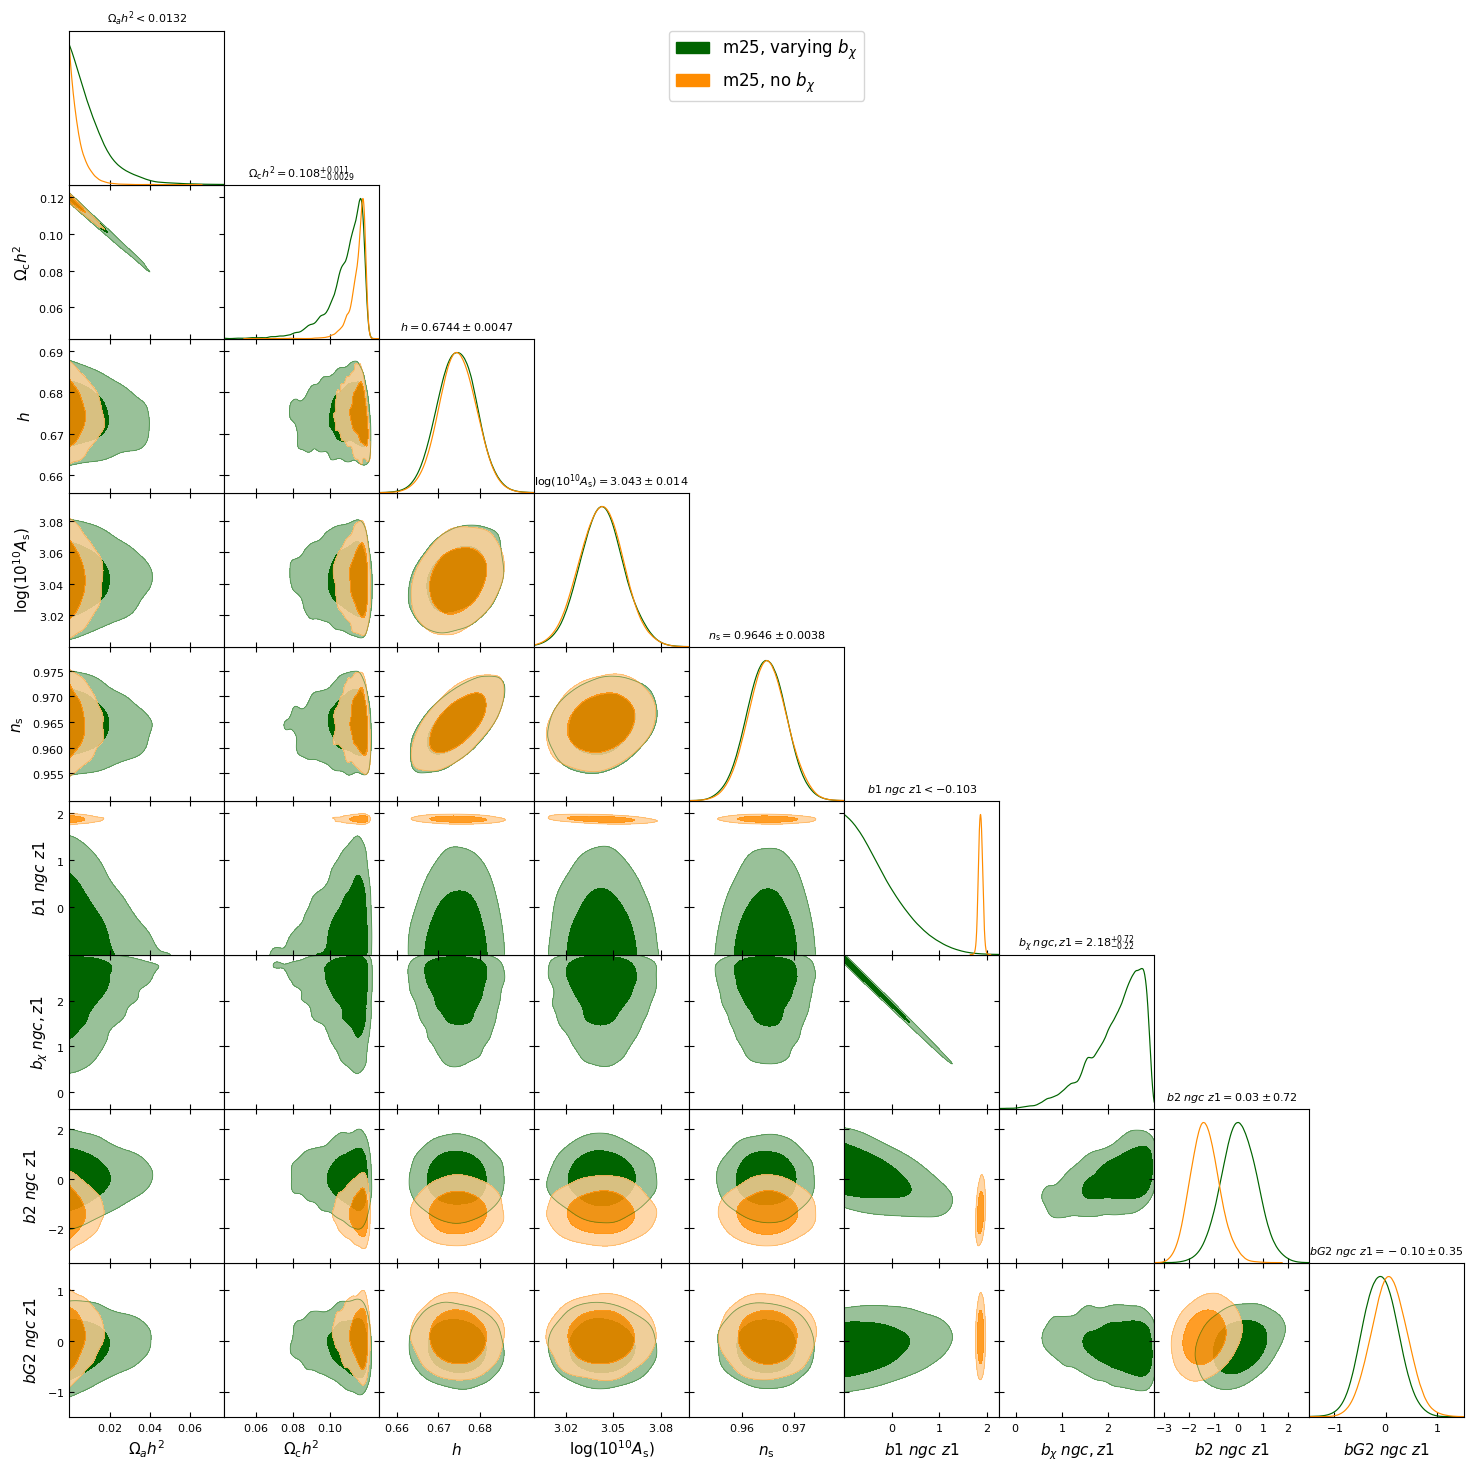

In [19]:
mstr = 'm25'
chainstoload = [
    {
        'path': f'/home/fverdian/cobaya/chains-ulysses/axigrid_bx/base_{mstr}/withbx/base_{mstr}_withbx.1.txt',
        'label': f'{mstr}, varying '+ r'$b_\chi$',
        'color': 'darkgreen'
    },
    {
        'path': f'/home/fverdian/cobaya/chains-ulysses/axigrid_bx/base_{mstr}/nobx/base_{mstr}_nobx.1.txt',
        'label': f'{mstr}, no '+ r'$b_\chi$',
        'color': 'darkorange'
    },
]
Samples = []
for ch in chainstoload:
    print(ch['path'][:-6])
    ss = load_samples(ch['path'][:-6], to_getdist=True) if ch['path'][-4:] == '.txt' else load_samples(ch['path'], to_getdist=True)
    ss.label = ch['label']; Samples.append(ss)


print([pn.name for pn in Samples[0].paramNames.names])
pars_toplot = ['omega_scf', 'omega_cdm','h', 'logA', 'n_s', 'b1_ngc_z1','bx_ngc_z1', 'b2_ngc_z1','bG2_ngc_z1']
# pars_toplot =['logA', 'n_s','omega_cdm',  'omega_scf','b1_ngc_z1','bx_ngc_z1']

gdplot = gdplt.get_subplot_plotter()
gdplot.settings.linewidth=1.5
gdplot.settings.legend_fontsize=15

gdplot.triangle_plot(Samples,  pars_toplot, contour_colors=[ch['color'] for ch in chainstoload], title_limit=1, filled=True)
# gdplot.finish_plot(no_tight=True)
gdplot.fig.savefig(f'/home/fverdian/cobaya/FRA/cornerplots/Planck+BOSS_bchi/{mstr}.pdf', bbox_inches='tight')
